In [1]:
import pymongo
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["portfolio"]
mycol = mydb["p"]

In [3]:
def plot(portfolio):
    change = portfolio[0:][['total_value']].values[0] / portfolio[-1:][['total_value']].values[0]
    tit = "Result: " + str(change[0])[:4].replace(".","") + "%"
    portfolio[["total_value", "value", "cash", "date"]].plot(x='date', figsize=(12, 5), title=tit)
    plt.show()

In [4]:
def extract_value(x):
    stocks = [v for v in x.values()]
    value = sum([s["adjusted_close"] for s in stocks])
    return value

In [5]:
def plot_portfolio(p_name):
    myquery = { "name": p_name }
    mydoc = list(mycol.find(myquery))

    dt = [(t["cash"], t['holdings'], t["date"]) for t in mydoc]

    df = DataFrame(dt, columns=["cash", "holdings", "date"])
    df['date'] = pd.to_datetime(df.date)
    df = df.sort_values(by='date', ascending=False)
    df.cash.astype('float')
    df['value'] = df.holdings.apply(lambda x: extract_value(x))
    df["total_value"] = df["cash"] + df["value"]
    plot(df)
    return df

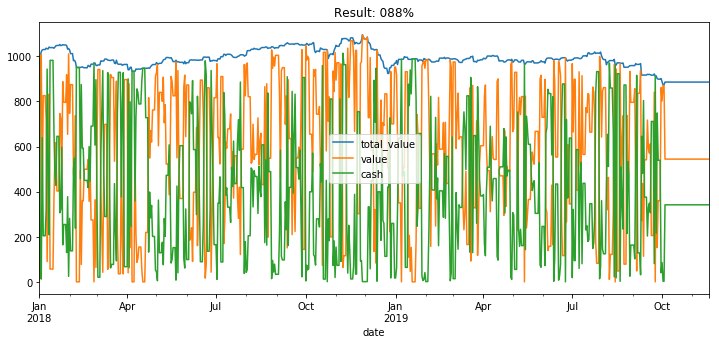

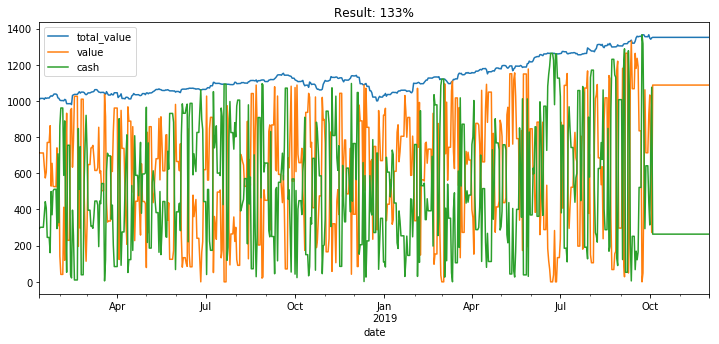

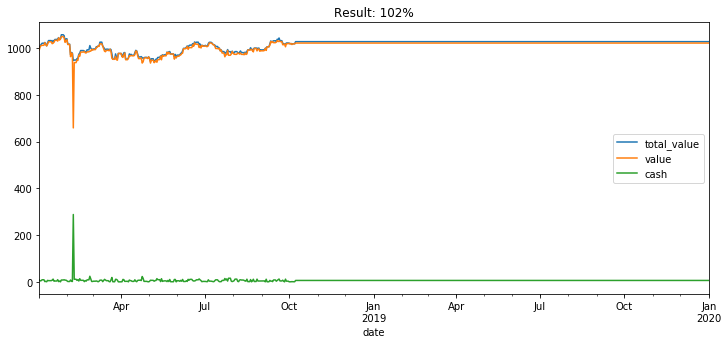

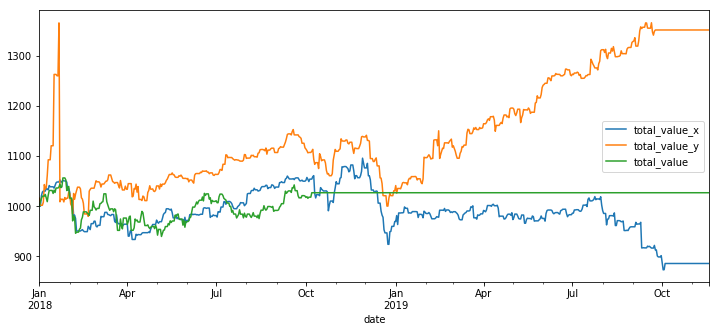

In [6]:
df1 = plot_portfolio("test-ada") # ADAboost - only 1000 samples
df2 = plot_portfolio("test1") # First Random forest
# df3 = plot_portfolio("test2-ada") # ADAboost - Full
# df3 = plot_portfolio("test3-ada") # ADAboost - Full - Sell first, buy later
df3 = plot_portfolio("test4-ada") # ADAboost - Full - Sell first, buy later (All stocks/buy/sell)

twoDf = df1[["date", "total_value"]].merge(df2[["date", "total_value"]], on='date', left_index=True, right_index=True, how='inner')
threeDf = twoDf.merge(df3[["date", "total_value"]], on='date', left_index=True, right_index=True, how='inner')
threeDf.plot(x='date', figsize=(12,5))
plt.show()

STD	 6.6186553052
Mean	 -0.166327405248
Med	 0.0
Var	 43.8065980491


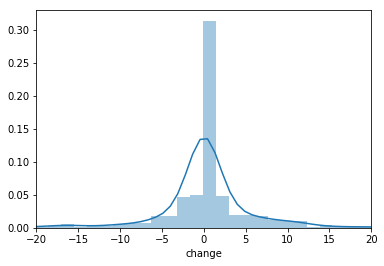

STD	 6.66277243674
Mean	 0.496882293179
Med	 0.0
Var	 44.3925365437


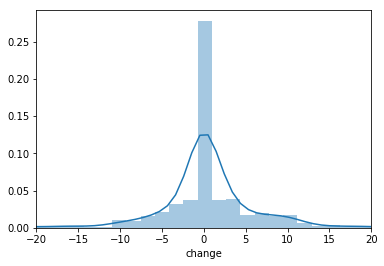

STD	 4.75856471532
Mean	 0.0368975308642
Med	 0.0
Var	 22.6439381499


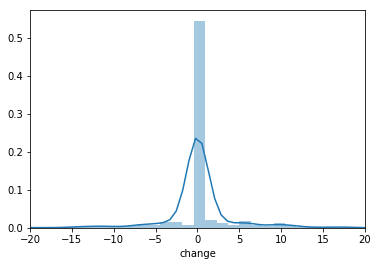

In [7]:
import seaborn as sns

def characteristics(df_sub):
    df_sub["change"] = df_sub.total_value.shift(1) - (df_sub.total_value)

    print("STD\t", df_sub.change.std())
    print("Mean\t", df_sub.change.mean())
    print("Med\t", df_sub.change.median())
    print("Var\t", df_sub.change.var())
    
    sns.distplot(df_sub.change.dropna(), bins=50)
    plt.xlim([-20,20])
    plt.show()
    
characteristics(df1)
characteristics(df2)
characteristics(df3)